In [2]:
%load_ext autoreload

In [29]:
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import daytradeai.data as data
import daytradeai.config as config
import daytradeai.preprocess as preprocess
import daytradeai.visualize as visualize
import daytradeai.util as util


# Get Data, Basic EDA

In [11]:
cfg = config.cfg

df_current = data.get_downloaded_data(cfg=cfg["data"])
df_new = data.get_new_data(cfg=cfg["data"], df_current=df_current)


2025-01-29 10:09:25,417 - daytradeai.data - INFO - Reading 1 files from /Users/davidschneider/data/daytradeai/prd/yfinance_downloads/dowjones


2025-01-29 10:09:25,460 - daytradeai.data - INFO - Fetching new data starting from 2025-01-29 00:00:00
[**********************89%******************     ]  25 of 28 completed2025-01-29 10:09:26,158 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[**********************93%********************   ]  26 of 28 completed2025-01-29 10:09:26,184 - urllib3.connectionpool - WARNING - Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[*********************100%***********************]  28 of 28 completed
2025-01-29 10:09:26,210 - daytradeai.data - WARNING - No new data found


In [12]:
df_raw = data.combine_dataframes(df_current, df_new)

In [14]:
df_raw[0:3]

Price           Close                                                 \
Ticker           AAPL        AMGN       AMZN         AXP          BA   
Date                                                                   
2020-01-28  76.998718  193.005341  92.662498  123.786827  314.687714   
2020-01-29  78.610481  194.988297  92.900002  123.067192  320.115387   
2020-01-30  78.496582  194.129852  93.533997  124.506500  321.387817   

Price                                                                 ...  \
Ticker             CAT         CRM       CSCO        CVX         DIS  ...   
Date                                                                  ...   
2020-01-28  122.933807  181.834381  40.899197  88.970375  136.681473  ...   
2020-01-29  122.070709  180.760376  40.282749  88.369865  134.399673  ...   
2020-01-30  121.702133  184.638702  40.445435  89.194550  136.128326  ...   

Price         Volume                                                          \
Ticker           MMM       MRK      MSFT      NKE       PG      TRV      UNH   
Date                                                                           
2020-01-28  10669157   9496347  24899900  5673200  6200200  1297700  4341000   
2020-01-29   6391304   8511227  34754500  4503700  5271000  1270900  3963800   
2020-01-30   5211092  11016471  51597500  7065100  5894400  1409700  4211800   

Price                                    
Ticker            V        VZ       WMT  
Date                                     
2020-01-28  7215700  15367500  15810600  
2020-01-29  7041700  13408900  11326500  
2020-01-30  8571900  16719600  13744500  

[3 rows x 196 columns]

In [43]:
cfg = config.cfg

df_preprocessed = preprocess.preprocess_data(df=df_raw, data_cfg=cfg["data"], preprocess_cfg=cfg["preprocess"])

2025-01-29 11:06:05,902 - daytradeai.preprocess - INFO - Preprocessing data...
2025-01-29 11:06:05,903 - daytradeai.preprocess - INFO - Adding index fund
2025-01-29 11:06:05,904 - daytradeai.preprocess - INFO - Adding diff lag features
/Users/davidschneider/code/mrcartoonology/DayTradeAI/src/daytradeai/preprocess.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feature_name] = cur - past
/Users/davidschneider/code/mrcartoonology/DayTradeAI/src/daytradeai/preprocess.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f

In [44]:
df_preprocessed[0:3]

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,label_JNJ,label_MMM,label_DIS,label_MRK,label_WMT,label_NKE,label_KO,label_CSCO,label_VZ,label_cash
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-28,75.765053,191.915167,92.025002,123.366263,316.168891,123.185536,180.133872,40.685154,88.858282,134.834297,...,0,0,1,0,0,0,0,1,1,0
2020-01-29,78.637146,193.571922,93.199997,123.814869,322.431623,123.697957,182.977985,41.070426,89.234584,136.908687,...,1,0,0,1,1,0,1,0,0,1
2020-01-30,77.689491,194.001096,92.900002,122.198054,318.604390,121.153722,179.895193,39.846115,87.921482,133.441517,...,0,0,1,0,0,0,1,1,1,0


In [46]:
preprocess.save_preprocessed(df_preprocessed, cfg["preprocess"])

2025-01-29 11:06:45,240 - daytradeai.preprocess - INFO - Overwriting preprocessed data: /Users/davidschneider/data/daytradeai/prd/preprocessed/2025-01-28.parquet


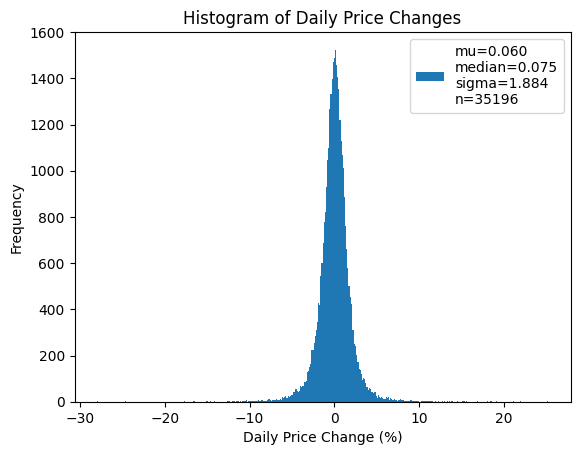

In [41]:
tickers = data.get_tickers(group=cfg['data']['stocks'])
visualize.hist_pdiff_1d(df_preprocessed, tickers=tickers);

_today_pdiff_1d 35140
_yesterday_pdiff_1d 35140
{'lower': np.float64(-1.9014170170682618), 'upper': np.float64(1.9123347219950424)}


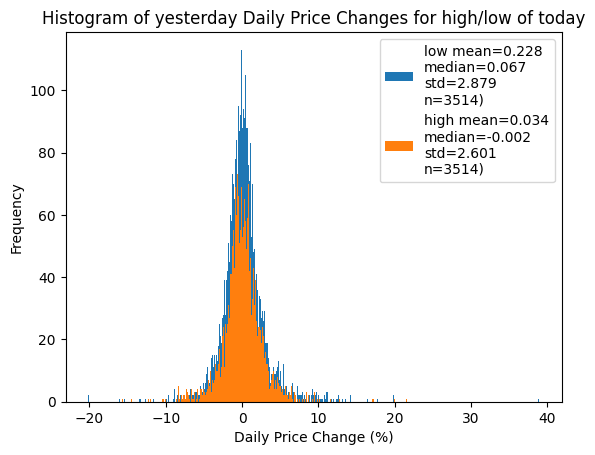

In [9]:
pdiffs_2d = dtai_visualize.correlate_yesterday_pdiff_with_today(df_p)
    

In [10]:
pdiffs_2d['rand'] = np.random.choice(pdiffs_1d, len(pdiffs_2d['low']), replace=False)
for group in ['low', 'high', 'rand']:
    res = dtai_util.goodnes_fit_tests(pdiffs_2d[group], pdiffs_1d)
    for stat_name, stat_pval in res.items():
        print(f"{group} {stat_name}:", stat_pval['pval'])


low ks_2samp: 1.0759242668993546e-21
low ttest_ind: 1.9383103915490566e-12
low mannwhitneyu: 5.095674903247732e-06
high ks_2samp: 2.0167701367795777e-18
high ttest_ind: 0.10574127217270983
high mannwhitneyu: 0.03911994430480265
rand ks_2samp: 0.24000614610107673
rand ttest_ind: 0.7836082681395206
rand mannwhitneyu: 0.3341773100301457


In [11]:
df_p.index.min()

Timestamp('2020-01-30 00:00:00')

In [12]:
df_p.index.max()

Timestamp('2025-01-27 00:00:00')

# Random Picker
What is the performance of a random picker?



In [97]:
df_new.iloc[-252]

Price   Ticker
Close   AAPL      1.877104e+02
        AMGN      2.955594e+02
        AMZN      1.535000e+02
        AXP       1.778186e+02
        BA        2.116100e+02
                      ...     
Volume  TRV       1.591200e+06
        UNH       7.367000e+06
        V         6.694300e+06
        VZ        1.711280e+07
        WMT       1.819050e+07
Name: 2024-01-18 00:00:00, Length: 210, dtype: float64

# visualize stocks

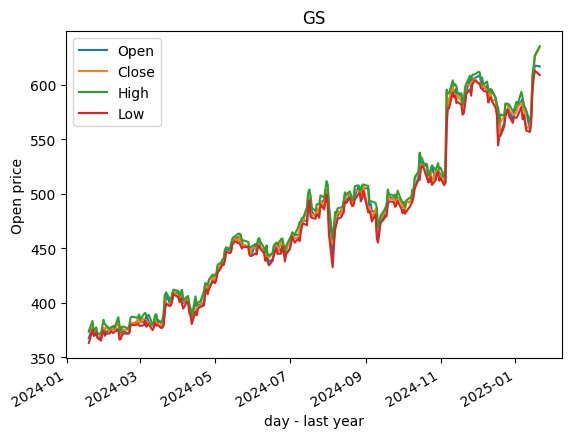

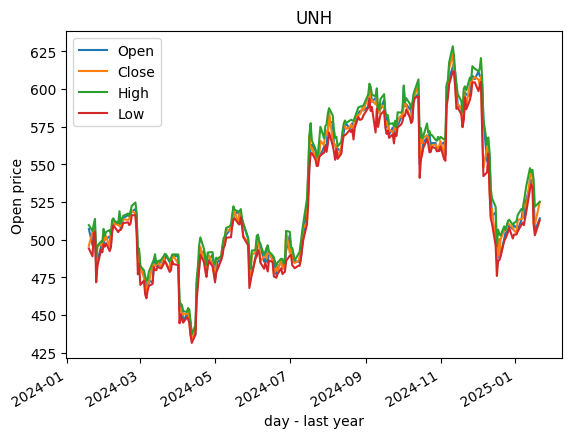

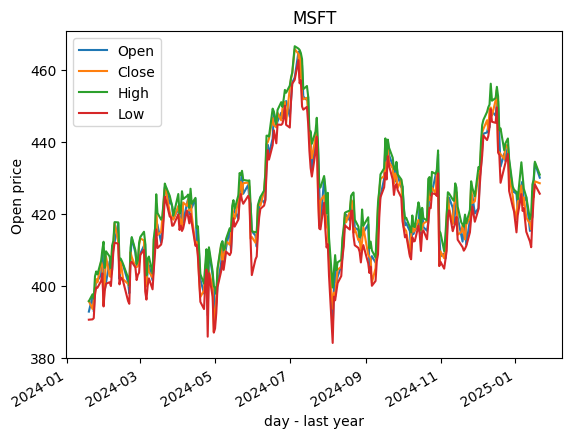

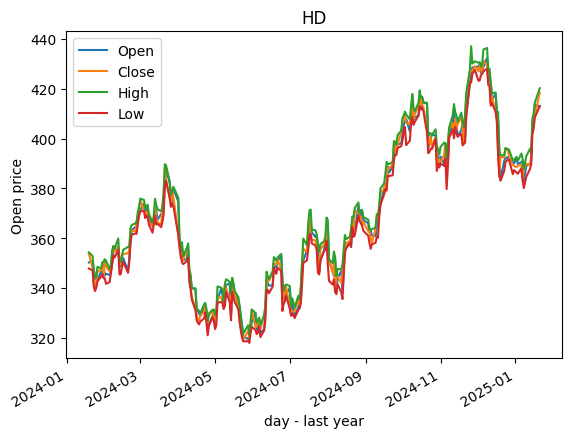

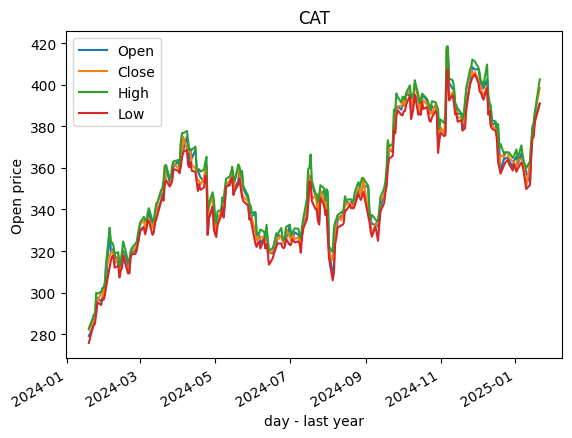

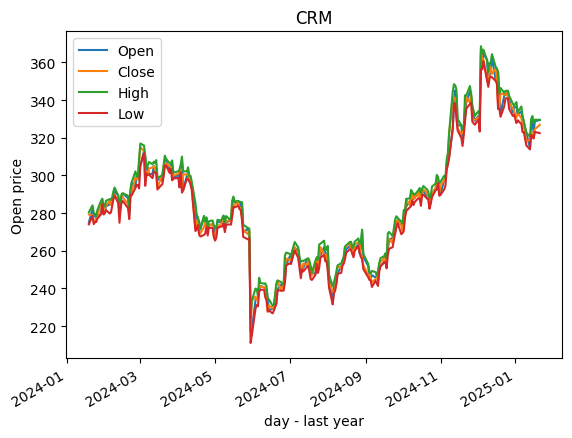

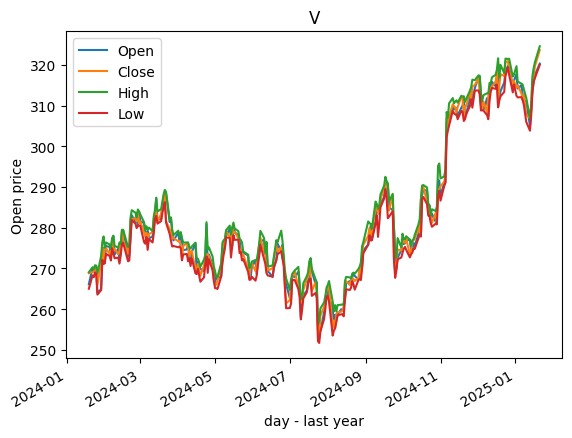

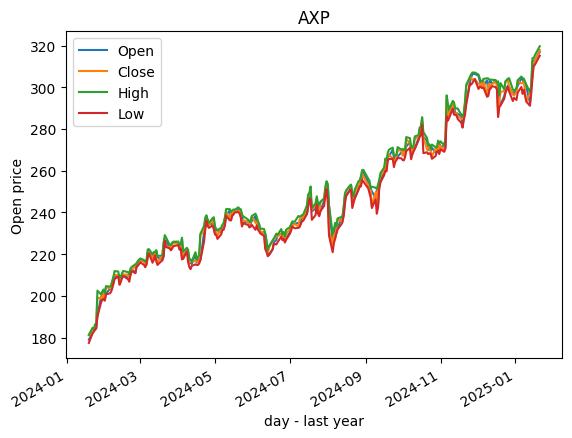

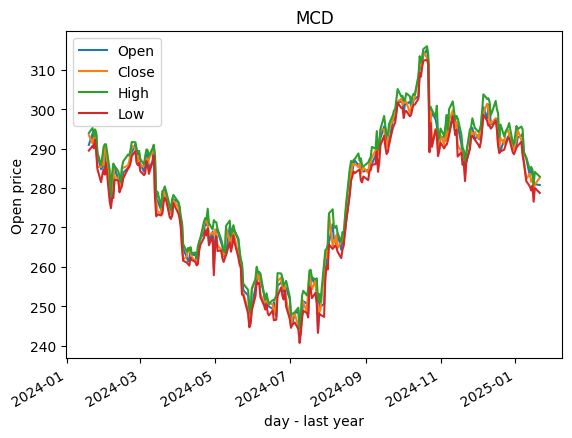

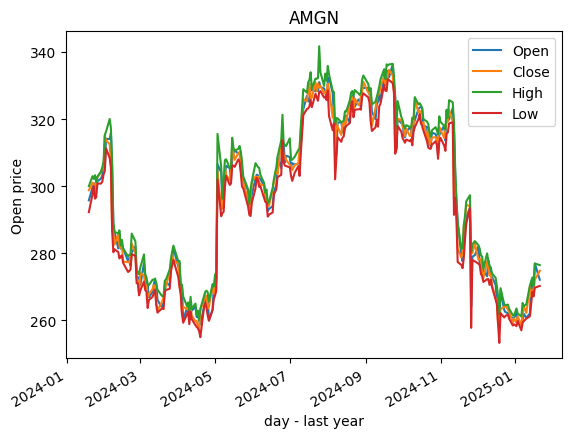

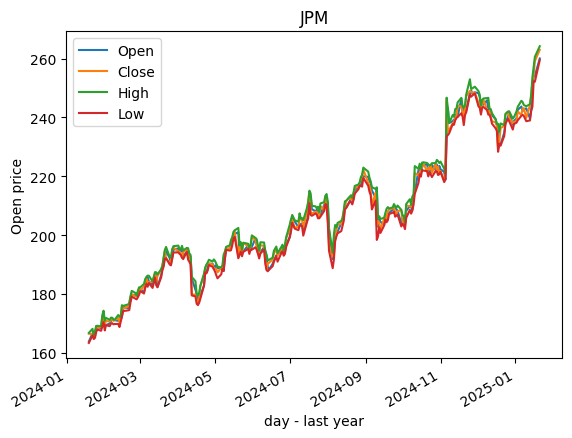

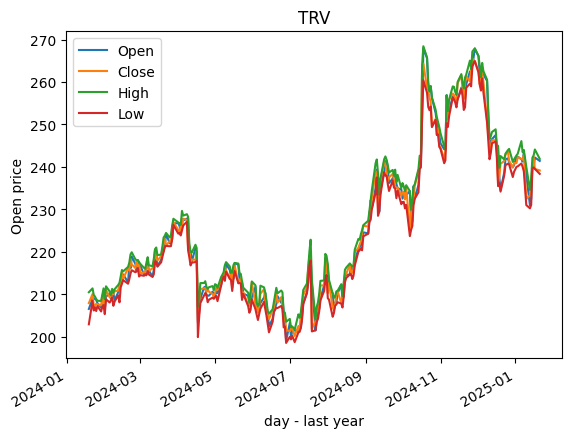

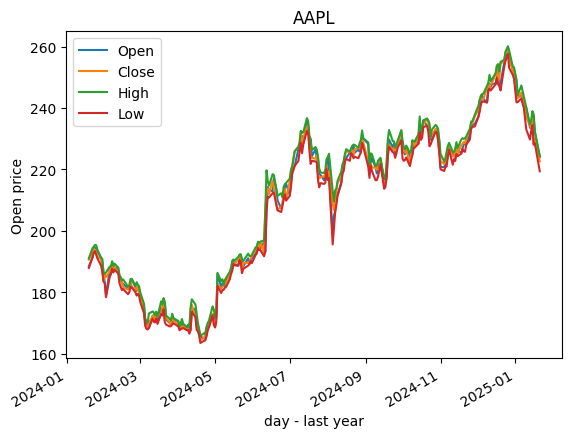

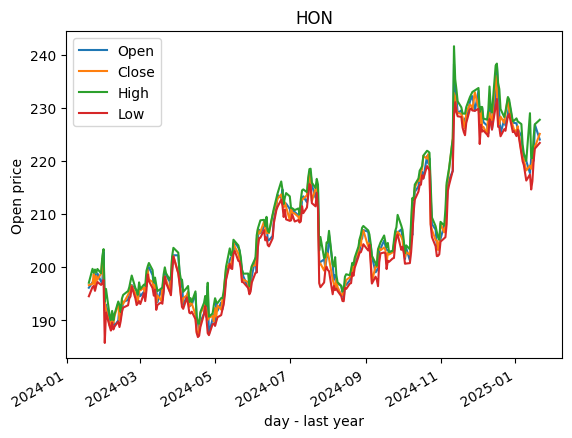

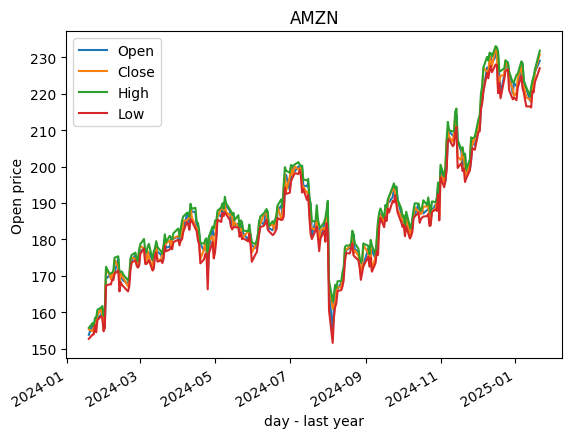

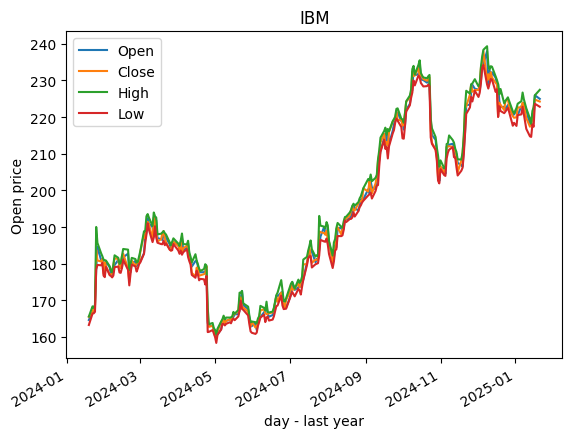

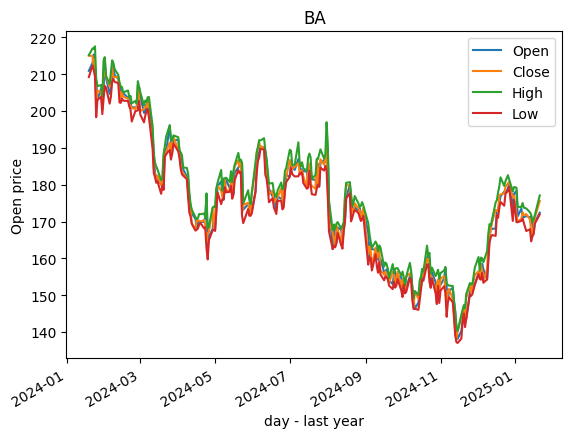

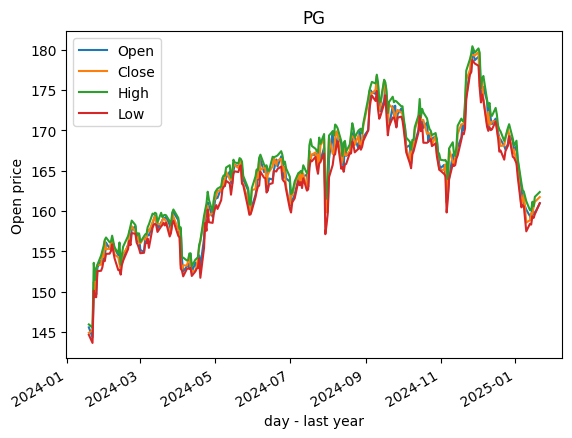

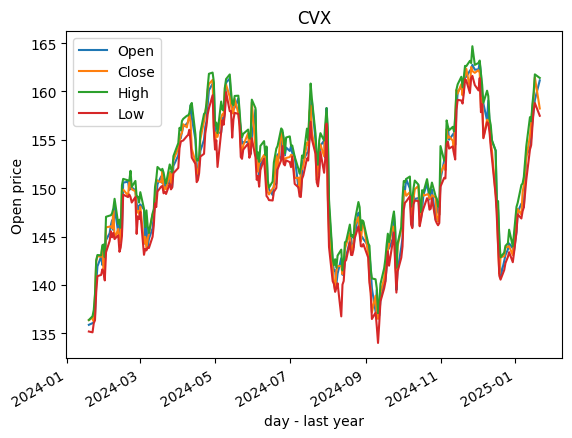

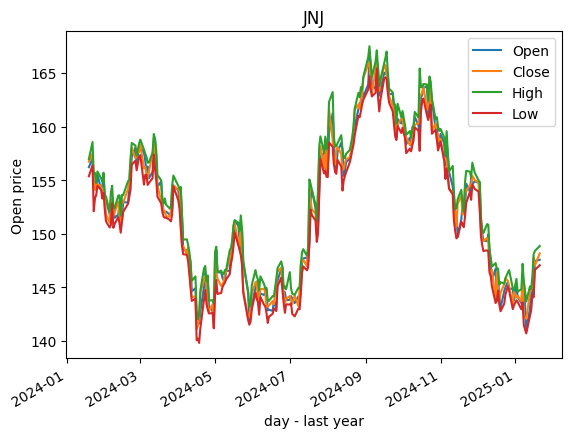

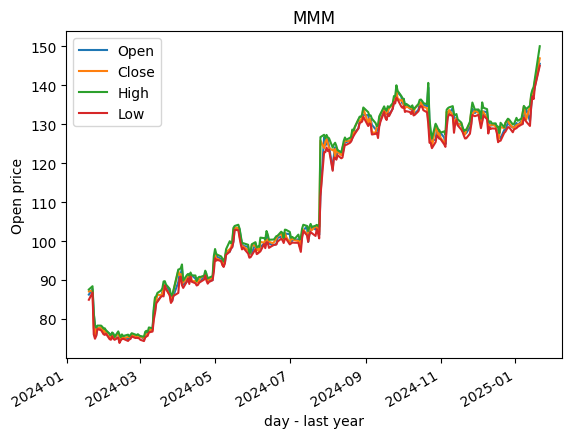

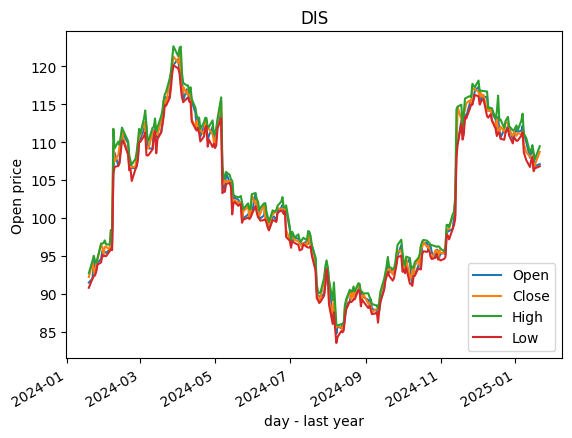

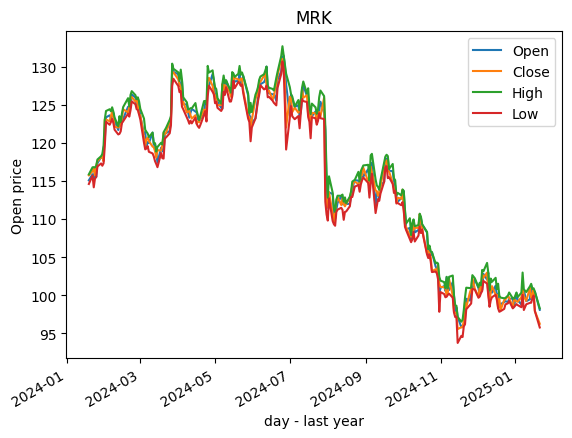

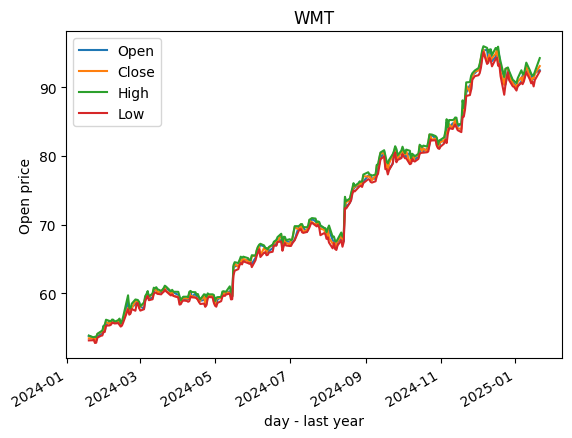

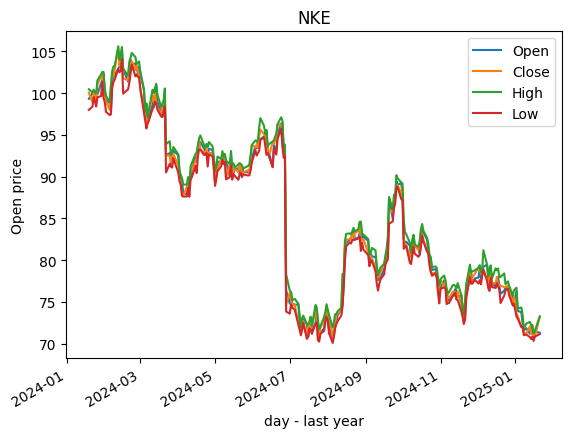

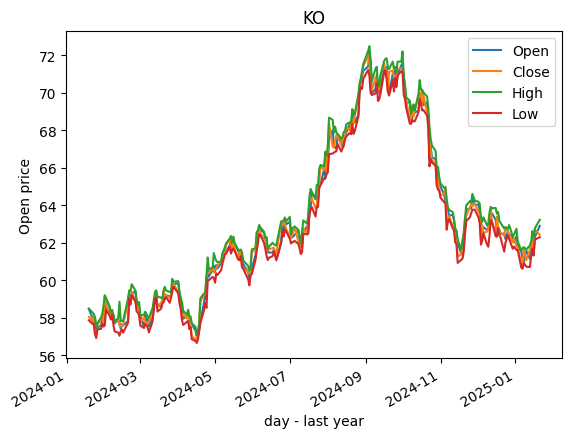

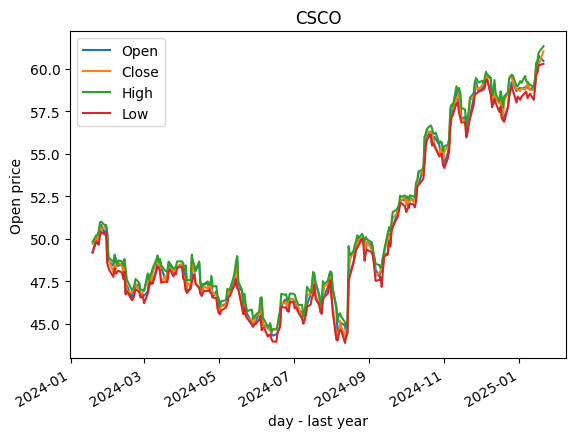

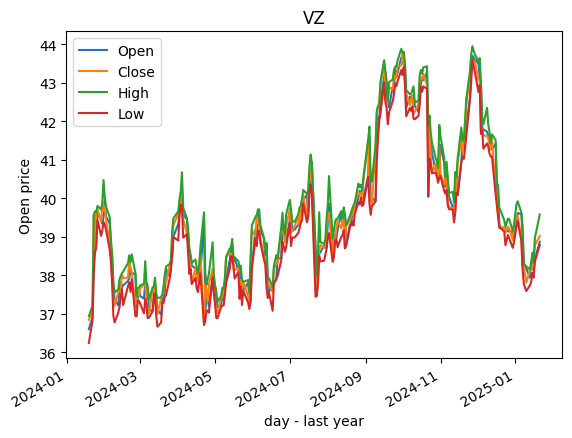

In [118]:
for stock in dtai.get_tickers('dowjones'):
    for metric in ['Open', 'Close', 'High', 'Low']:
        df_new.iloc[-252:][metric][stock].plot(label=metric)
    plt.title(stock)
    plt.xlabel('day - last year')
    plt.ylabel('Open price')
    plt.legend()
    plt.show()

# Policy

In [135]:
df_new['Open'][['AAPL', 'MSFT']].iloc[-252]

Ticker
AAPL    188.406990
MSFT    392.822563
Name: 2024-01-19 00:00:00, dtype: float64

In [128]:
df_new.index.min()

Timestamp('2020-01-22 00:00:00')

In [ ]:
def price_weighted_index(prices):
    weights = prices / prices.sum()
    return (prices * weights).sum()


def index_performance(df, lag=0, period_days=252, method='price_weighted_index'):
    stocks = dtai.get_tickers(dtai.cfg['stocks'])
    last_day = -1 - lag
    one_year_ago = last_day - period_days
    initial_prices = df['Open'].iloc[one_year_ago]
    final_prices = df['Open'].iloc[last_day]
    if method == 'price_weighted_index':
        initial_value = price_weighted_index(initial_prices)
        final_value = price_weighted_index(final_prices)
    elif method == 'equal_shares':
        initial_value = np.sum(initial_prices)
        final_value = np.sum(final_prices)
    elif method == 'equal_initial':
        weights = 1.0 / initial_prices
        weights /= weights.sum()
        initial_value = np.sum(weights * initial_prices)
        final_value = np.sum(weights * final_prices)
    return final_value / initial_value - 1.0

print("price weighted: ", index_performance(df=df_new))
print("equal shares: ", index_performance(df=df_new, method="equal_shares"))
print("equal inital investment: ", index_performance(df=df_new, method="equal_initial"))

price weighted:  0.2326509407983237
equal shares:  0.21194259163020357
equal inital investment:  0.22526929222707692


In [ ]:
df_p

Text(0.5, 1.0, 'Equal shares index performance period=50')

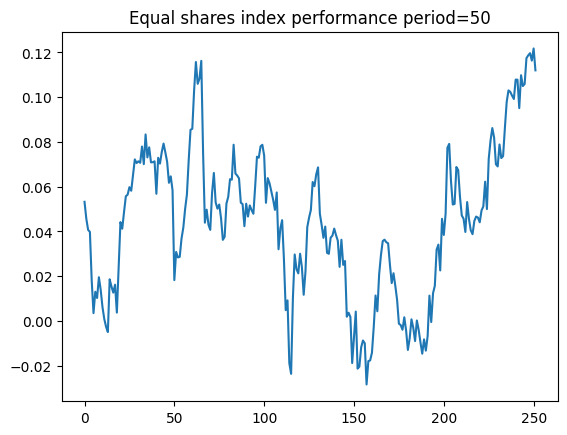

In [153]:
period=50;
period_return = [index_performance(df=df_new, lag=k, period_days=period, method='equal_shares') for k in range(252)]
plt.plot(period_return)
plt.title(f'Equal shares index performance period={period}')

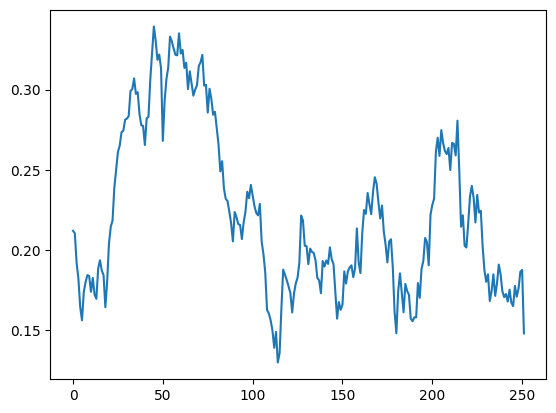

In [138]:
plt.plot(one_year_return)

In [95]:
df_new['Open'].loc[pd.Timestamp('2025-01-17')] - df_new['Open'].loc[pd.Timestamp('2024-01-18')]

Ticker
AAPL     46.937217
AMGN    -16.415155
AMZN     73.069992
AXP     134.894803
BA      -35.839996
CAT     109.100328
CRM      57.236367
CSCO     11.998878
CVX      22.036178
DIS      16.984443
GS      246.465225
HD       65.884110
HON      33.253903
IBM      65.278637
JNJ      -7.650001
JPM      90.754983
KO        4.389006
MCD      -4.199094
MMM      53.723718
MRK     -14.054111
MSFT     45.277529
NKE     -27.866687
NVDA     79.446229
PG       14.197203
SHW      60.718842
TRV      50.133988
UNH       8.178343
V        51.652019
VZ        2.327483
WMT      38.986264
dtype: float64